In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [4]:
X = df.drop('target', axis = 1)
Y = df['target']

In [5]:
from sklearn.preprocessing import StandardScaler
# Standrizing
scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': list(range(10))},
    'KNN': {'n_neighbors': list(range(3,12,2))}
}

grid_search_results = {}

# Finding best params through Grid search
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
    grid_search.fit(X_train, Y_train)
    grid_search_results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    }
    
scores_crossentropy = {}
precision = {}
f1 = {}
recall = {}
# Cross validation should be made, but it is complex loops enough

# getting all meterics for all models
for model_name, result in grid_search_results.items():
    model = result['best_estimator']
    Y_pred = model.predict(X_test)
    scores_crossentropy[model_name] = model.score(X_test, Y_test)
    precision[model_name] = precision_score(Y_test, Y_pred, average='weighted')
    f1[model_name] = f1_score(Y_test, Y_pred, average='weighted')
    recall[model_name] = recall_score(Y_test, Y_pred, average='weighted')

print('Params:', grid_search_results,
      'Cross Entropy score:', scores_crossentropy,
      'precision:', precision, 
      'F1:', f1, 
      'Recall:', recall, 
      sep = '\n')

Params:
{'Logistic Regression': {'best_params': {'C': 10}, 'best_score': 0.9583333333333334, 'best_estimator': LogisticRegression(C=10, max_iter=200)}, 'Decision Tree': {'best_params': {'max_depth': 2}, 'best_score': 0.95, 'best_estimator': DecisionTreeClassifier(max_depth=2)}, 'KNN': {'best_params': {'n_neighbors': 7}, 'best_score': 0.9416666666666667, 'best_estimator': KNeighborsClassifier(n_neighbors=7)}}
Cross Entropy score:
{'Logistic Regression': 1.0, 'Decision Tree': 0.9666666666666667, 'KNN': 1.0}
precision:
{'Logistic Regression': 1.0, 'Decision Tree': 0.9690476190476189, 'KNN': 1.0}
F1:
{'Logistic Regression': 1.0, 'Decision Tree': 0.9657687991021324, 'KNN': 1.0}
Recall:
{'Logistic Regression': 1.0, 'Decision Tree': 0.9666666666666667, 'KNN': 1.0}


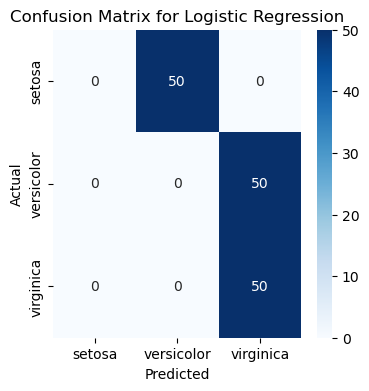

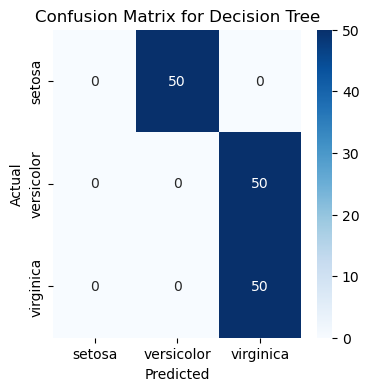

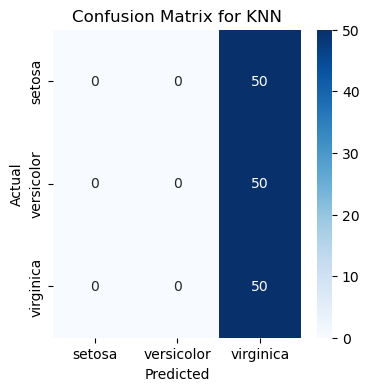

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in grid_search_results.items():
    model = result['best_estimator']
    # Using the whole dataset
    Y_pred = model.predict(X)
    cm = confusion_matrix(Y, Y_pred)
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
